In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
import joblib


In [12]:
df = pd.read_csv('framingham.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [14]:
df.dropna(inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [16]:
df.reset_index(inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3658 non-null   int64  
 1   male             3658 non-null   int64  
 2   age              3658 non-null   int64  
 3   education        3658 non-null   float64
 4   currentSmoker    3658 non-null   int64  
 5   cigsPerDay       3658 non-null   float64
 6   BPMeds           3658 non-null   float64
 7   prevalentStroke  3658 non-null   int64  
 8   prevalentHyp     3658 non-null   int64  
 9   diabetes         3658 non-null   int64  
 10  totChol          3658 non-null   float64
 11  sysBP            3658 non-null   float64
 12  diaBP            3658 non-null   float64
 13  BMI              3658 non-null   float64
 14  heartRate        3658 non-null   float64
 15  glucose          3658 non-null   float64
 16  TenYearCHD       3658 non-null   int64  
dtypes: float64(9),

In [20]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose']

target = ['TenYearCHD']

In [21]:
X = df[features]

In [23]:
X.shape

(3658, 15)

In [24]:
y = df[target]

In [25]:
y.shape

(3658, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(2926, 15)

In [31]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3386,1,40,1.0,1,20.0,0.0,0,0,0,191.0,130.5,63.0,23.92,79.0,66.0
343,0,48,3.0,0,0.0,0.0,0,0,0,310.0,124.0,74.0,25.94,70.0,73.0
1588,1,44,1.0,1,40.0,0.0,0,1,0,201.0,142.5,104.5,34.59,67.0,67.0
1601,0,50,3.0,0,0.0,0.0,0,0,0,229.0,105.0,72.5,26.25,90.0,79.0
678,0,46,3.0,1,20.0,0.0,0,0,0,253.0,118.0,82.0,19.70,100.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,38,2.0,1,15.0,0.0,0,0,0,233.0,137.0,75.0,20.55,100.0,107.0
1294,0,58,2.0,1,3.0,0.0,0,0,0,242.0,123.0,69.0,23.38,74.0,72.0
860,1,47,4.0,0,0.0,0.0,0,0,0,194.0,115.0,82.0,28.23,48.0,76.0
3507,1,53,2.0,0,0.0,0.0,0,0,0,275.0,109.0,79.0,27.75,67.0,104.0


In [28]:
X_test.shape

(732, 15)

In [29]:
y_train.shape

(2926, 1)

In [30]:
y_test.shape

(732, 1)

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [34]:
model.fit(X_train, y_train)

c:\Users\SreeKeerthiReddyThat\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [35]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [36]:
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [37]:
y_pred = model.predict(X_test)
print(f"Accuracy:", accuracy_score(y_test, y_pred))
print("Classifictaion Report: ",classification_report(y_test, y_pred))

Accuracy: 0.837431693989071
Classifictaion Report:                precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.67      0.05      0.09       122

    accuracy                           0.84       732
   macro avg       0.75      0.52      0.50       732
weighted avg       0.81      0.84      0.77       732



In [43]:
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model_pickle = pickle.load(f)

In [44]:
sample_input = X_test.iloc[0:1]
print("Prediction from pickle model: ", loaded_model_pickle.predict(sample_input))

Prediction from pickle model:  [0]


In [45]:
loaded_model_joblib = joblib.load('random_forest_model.joblib')
print("Prediction from joblib model: ", loaded_model_pickle.predict(sample_input))

Prediction from joblib model:  [0]


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_10048\1121241786.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




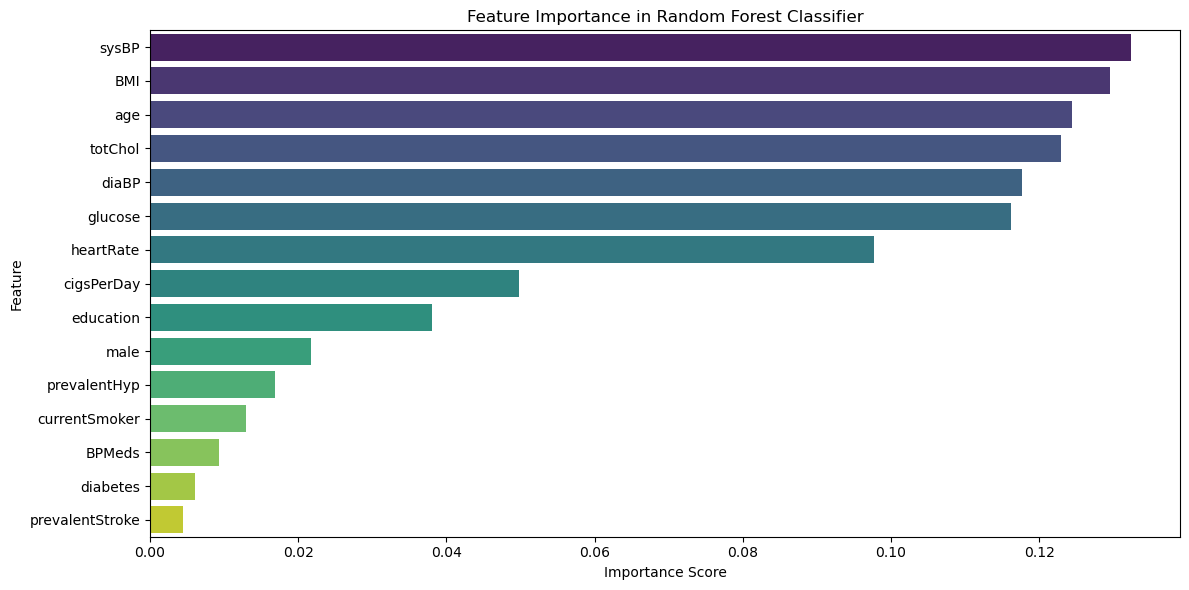

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = model.feature_importances_

# Match importance to feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_10048\1090408911.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




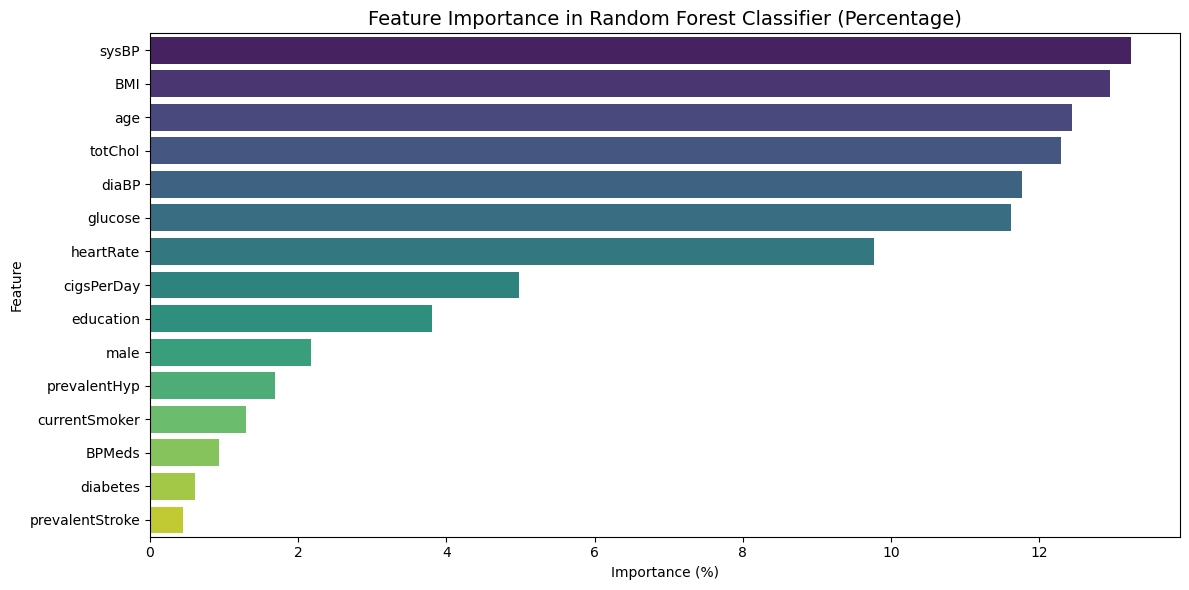

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances and convert to percentage
importances = model.feature_importances_
importances_percent = 100.0 * (importances / importances.sum())

# Match importance to feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances_percent
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Classifier (Percentage)', fontsize=14)
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Define function to calculate metrics
def evaluate_performance(y_true, y_pred, dataset='Dataset'):
    print(f"\n📘 Evaluation Metrics for {dataset}")
    print("-" * 40)
    print(f"Accuracy      : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision     : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall        : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score      : {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Evaluate on training data
evaluate_performance(y_train, y_train_pred, dataset='Training Data')

# Evaluate on testing data
evaluate_performance(y_test, y_test_pred, dataset='Testing Data')



📘 Evaluation Metrics for Training Data
----------------------------------------
Accuracy      : 1.0000
Precision     : 1.0000
Recall        : 1.0000
F1 Score      : 1.0000

Confusion Matrix:
[[2491    0]
 [   0  435]]

📘 Evaluation Metrics for Testing Data
----------------------------------------
Accuracy      : 0.8374
Precision     : 0.6667
Recall        : 0.0492
F1 Score      : 0.0916

Confusion Matrix:
[[607   3]
 [116   6]]
